In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("Salary_Data.csv")
df.shape

(30, 2)

In [2]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

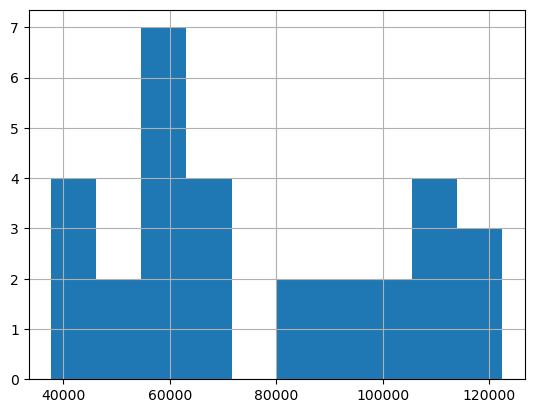

In [4]:
df['Salary'].hist()

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

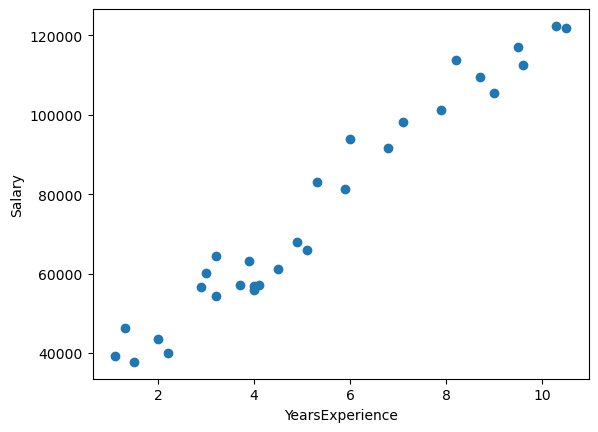

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
x=df[["YearsExperience"]]
y=df[["Salary"]]

In [9]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [10]:
LR.fit(x,y)

LinearRegression()

In [11]:
#B0 
print("Intercept value:",LR.intercept_)
#B1
print("Coeffient value:",LR.coef_)

Intercept value: [25792.20019867]
Coeffient value: [[9449.96232146]]


In [12]:
y_pred=LR.predict(x)
y_pred

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [13]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


[]

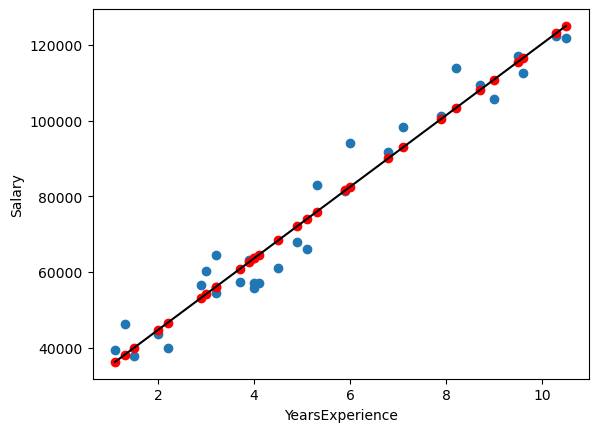

In [14]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.scatter(df["YearsExperience"],y_pred, color = "Red")
plt.plot(df["YearsExperience"],y_pred, color = "black")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.plot()

In [15]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y,y_pred)
print("mean squared error:",mse.round(2))

RMSE = np.sqrt(mse)
print("root mean square error:",RMSE.round(2))

r2 = r2_score(y,y_pred)
print("r square:",r2.round(2))

mean squared error: 31270951.72
root mean square error: 5592.04
r square: 0.96


In [16]:
# standardization is making our data in between -3 to +3
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
SS_x.columns = list(x)
SS_x.head()

,YearsExperience
0,-1.510053
1,-1.438373
2,-1.366693
3,-1.187494
4,-1.115814


In [17]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_x,y, test_size=0.30)

# model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

from sklearn.metrics import mean_squared_error
er1 = np.sqrt(mean_squared_error(Y_train,Y_pred_train))
er2 = np.sqrt(mean_squared_error(Y_test,Y_pred_test))
print("Training Error: ", er1.round(2))
print("Testing Error: ", er2.round(2))

Training Error:  5835.58
Testing Error:  5028.99


In [18]:
# Cross Validation Method...
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split

training_error = []
test_error = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_x,y, test_size = 0.30,random_state = i)
    LR.fit(X_train,Y_train)
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
    
    
print("Cross Validation Training error:",np.mean(training_error).round(2))
print("Cross validation Tests error:",np.mean(test_error).round(2))

Cross Validation Training error: 5592.55
Cross validation Tests error: 5736.87
